<a href="https://colab.research.google.com/github/Max-J-Schultz/repo_test/blob/main/DS110_Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Most Streamed Spotify Songs in 2023 (so far) Analysis:

By: Max Schultz, Chanel Thorpe, Tatum Hennessy, and Anushka Bhat

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import files
uploaded = files.upload()
!ls

Saving spotify-2023.csv to spotify-2023.csv
sample_data  spotify-2023.csv


So we have loaded the CSV file and now we want to see the general form and the first few rows/ columns.

In [3]:
df = pd.read_csv('spotify-2023.csv', encoding= 'latin-1')
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

# Cleaning the Data:
Now that we've seen the general form of our data, let's see if there are any null values in our columns — if there are, how many are there?

In [4]:
#Checking null values of our columns
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


Now, we see that there are some null values in the "in_shazam_charts" and "key" columns so lets get rid of those...

In [5]:
#Removing duplicate values
df.drop_duplicates(inplace=True)

#Handles the null values from earlier
df.dropna(inplace=True)

#Reseting the index after dropping rows
df.reset_index(drop=True, inplace=True)

#Fills the null values in 'key' with unknown
df['key'] = df['key'].fillna('Unknown')

#Fills the null values in 'in_shazam_charts' with 0
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

#Show Cleaned DataFrame/ test to make sure our cleaninng worked
print(df.head())
print(df.isnull().sum())
print(df.info())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

# Top 1000 Songs/ Numerical Value Analysis - Visualization #1

In [6]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df_num = df.select_dtypes(include = ["float64", "int64"]).copy()
df_num.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,65,23,80,14,63,11,6


We can utilize a hitogram plot to show general shape, spread, etc. from our entire cleaned, modified dataset

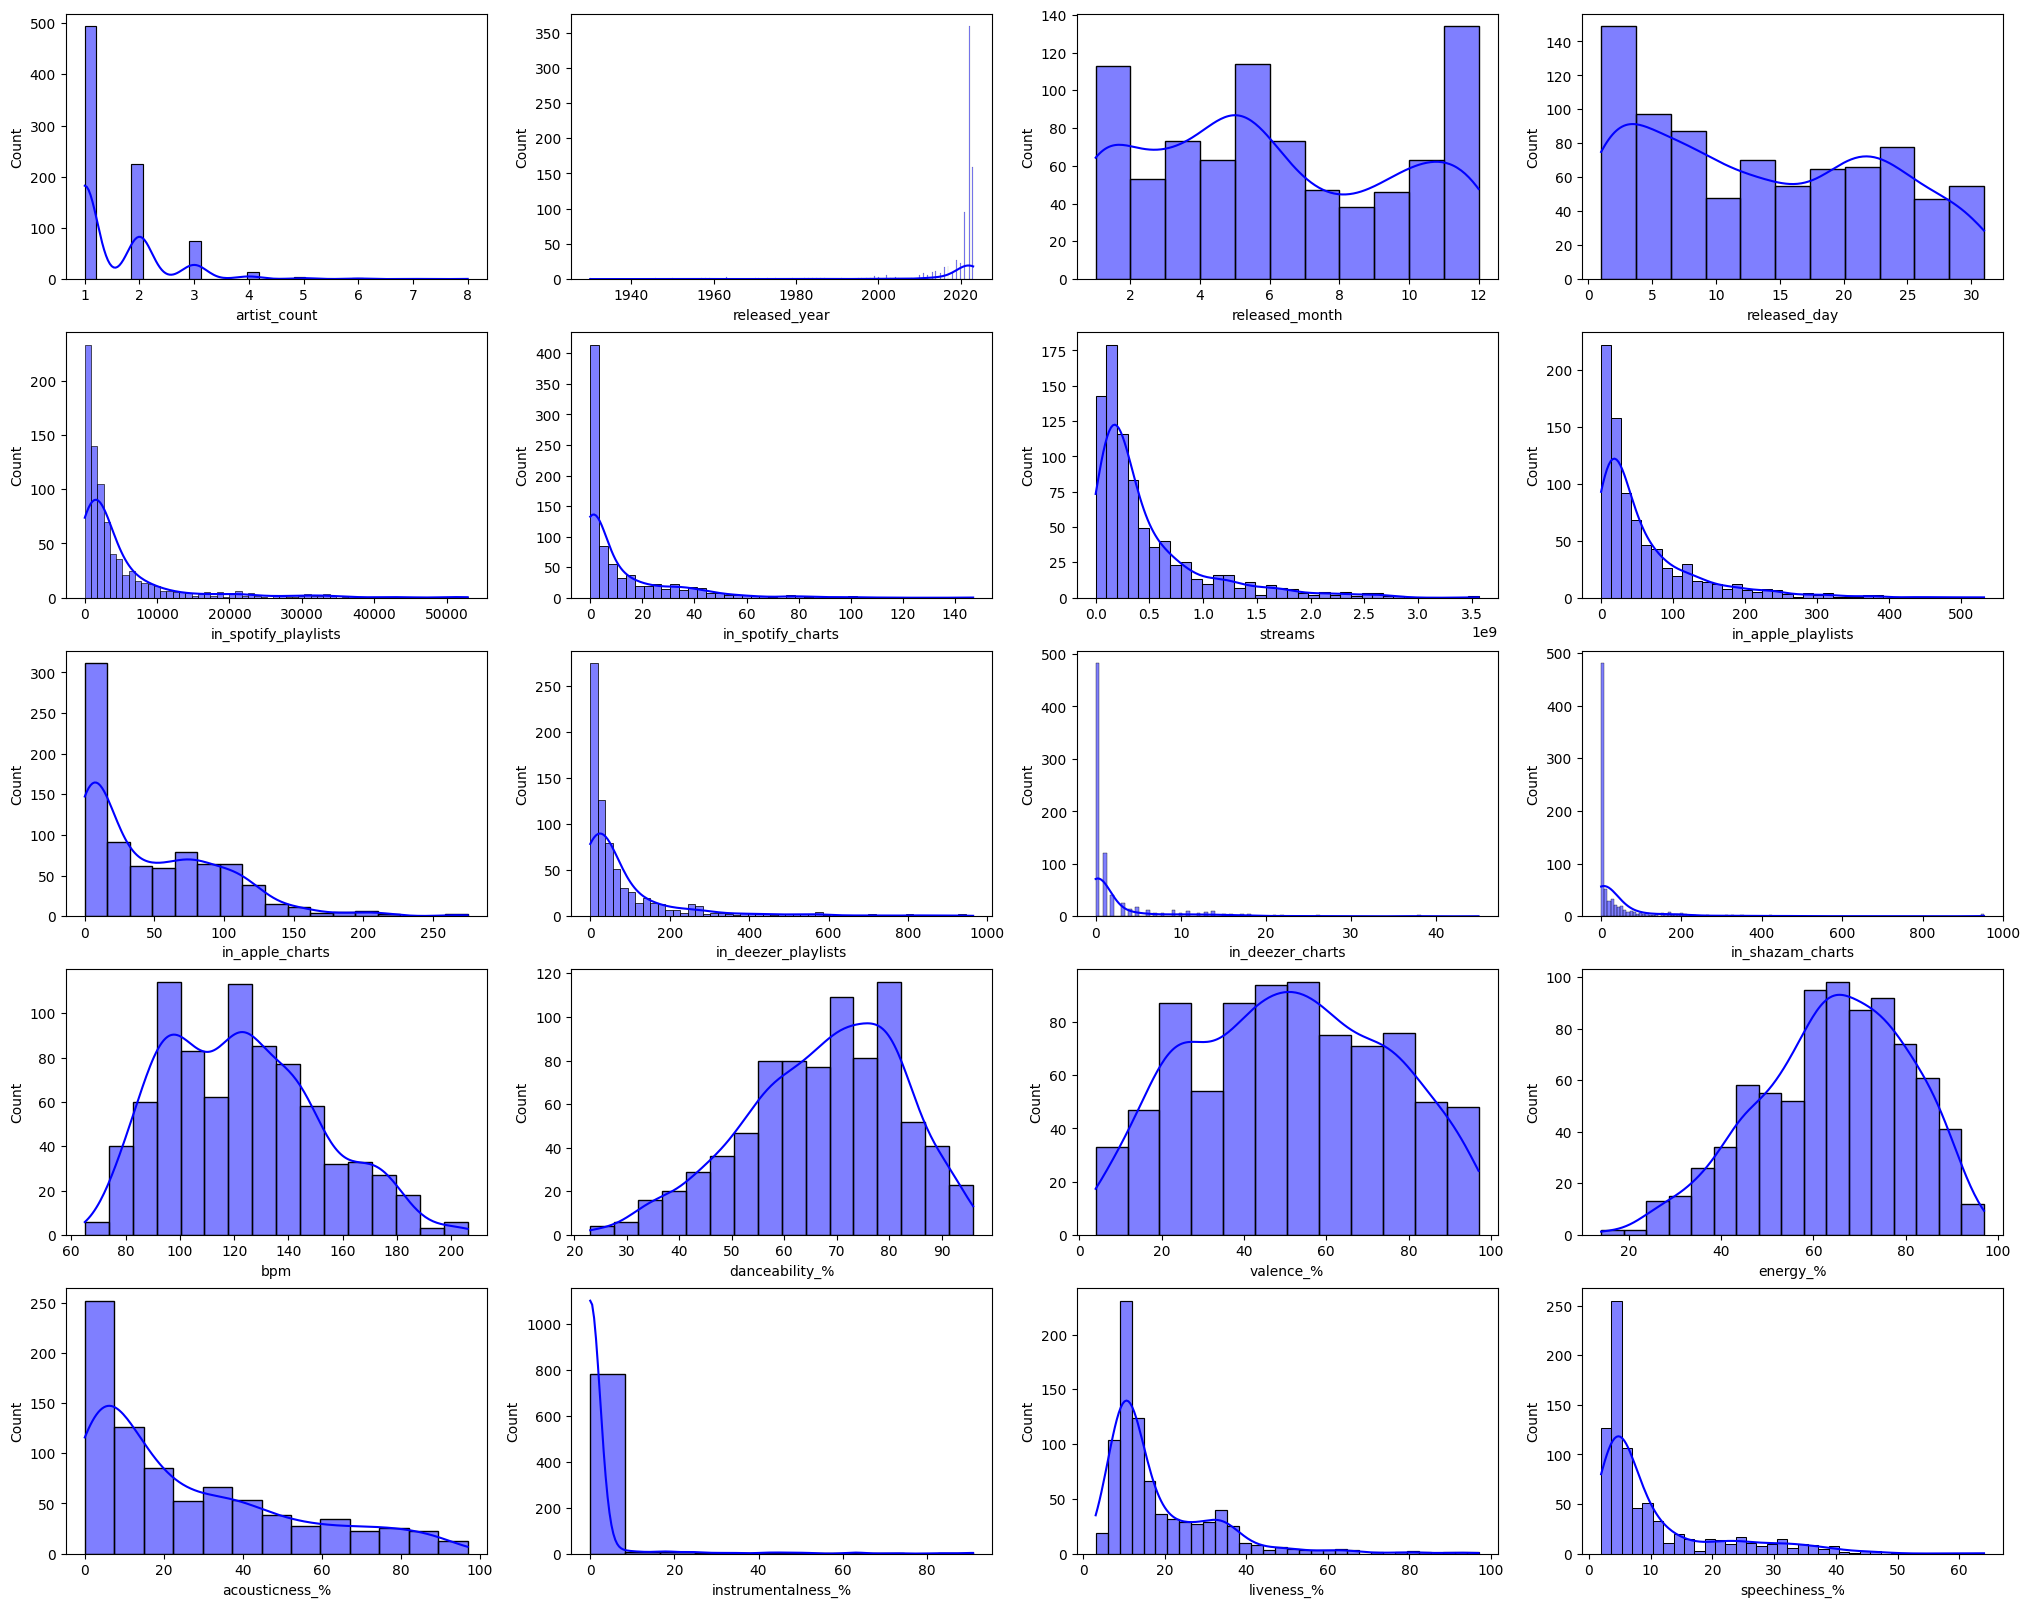

In [7]:
f,ax = plt.subplots(5,4,figsize=(25, 20))

for i, col in enumerate(df_num.columns):
        sns.histplot(data=df_num, x=col, kde=True, color='blue', ax=ax[i//4,i%4])

plt.show()

This graph analyzes the numerical values of each column — through this, we can analyze each column by looking at key characteristics such as Shape, Center, and Spread of the graphs.

-> Because danceability%, energy%, and released year are left skewed, this suggests that most songs in the top 1000 are danceable, energetic, and relatively new. Additionally, one can analyze the artist count graph and see that the majority of songs in the top 1000 have 1 artist.

-> Right skewed graphs such as acousticness%, instrumentalness%, liveness%, and speechiness% suggest that most of the songs in the top 1000 have low acousticness, instrumentalness, liveness, and speechiness.

# Correlation Matrix for Top 1000 Songs - Visualization #2

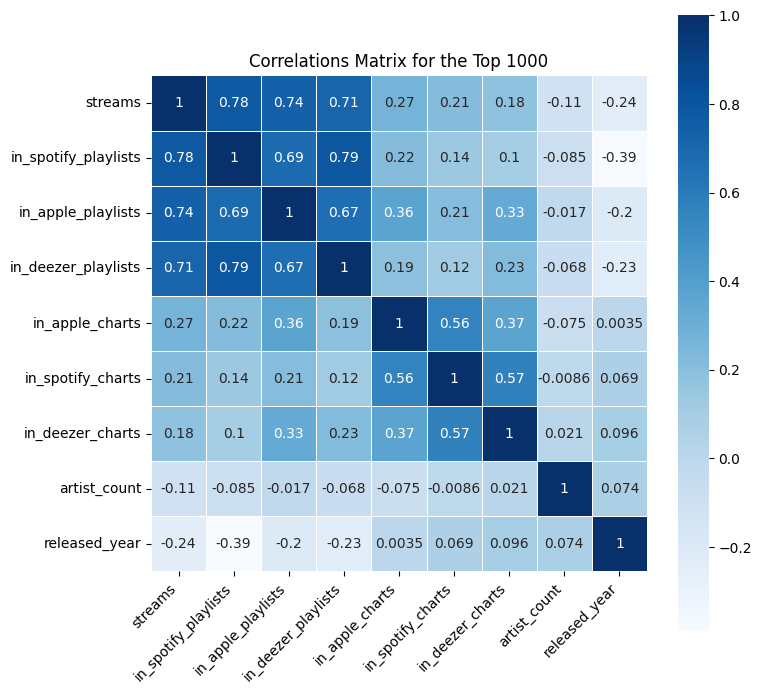

In [8]:
#Calculating the corr. matrix for the entire DataFrame
cor_numVar = df_num.corr(method='pearson')

#sorting on decreasing correlations
cor_sorted = cor_numVar['streams'].sort_values(ascending=False)

# select only high correlations
CorHigh = cor_sorted[abs(cor_sorted) > 0.1].index
cor_numVar = cor_numVar.loc[CorHigh, CorHigh]

#plotting the correlation matrix
plt.figure(figsize=(8, 8))
corrplot = sns.heatmap(cor_numVar, annot=True, cmap='Blues', square=True, linewidths=0.5, linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations Matrix for the Top 1000')

plt.show()

**TODO(analysis)**

# Top Artists with Most Songs in the top 1000 - Visualization #3

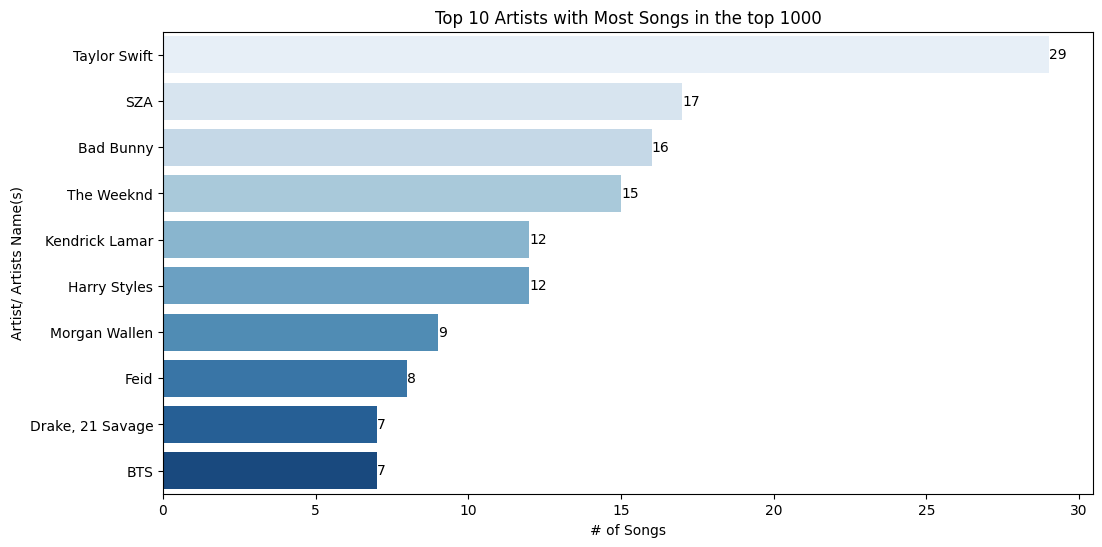

In [9]:
top_artists = df['artist(s)_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette='Blues')
plt.xlabel('# of Songs')
plt.ylabel('Artist/ Artists Name(s)')
plt.title('Top 10 Artists with Most Songs in the top 1000')
ax.bar_label(ax.containers[0])
plt.show()

This one is pretty intuitive — This barplot shows the artists with the mosts songs in the top 1000.

How to read: Starting from the top, you can see that Taylor Swift has the most songs in the dataset (29) and BTS/ Drake, 21 Savage are tied with the 10th most songs in the dataset (7) - although, they have the same # of songs, they are two distinct artists which is why tehy are represented in this manner.

# Pair Plot of Numerical Features - Visualization #4

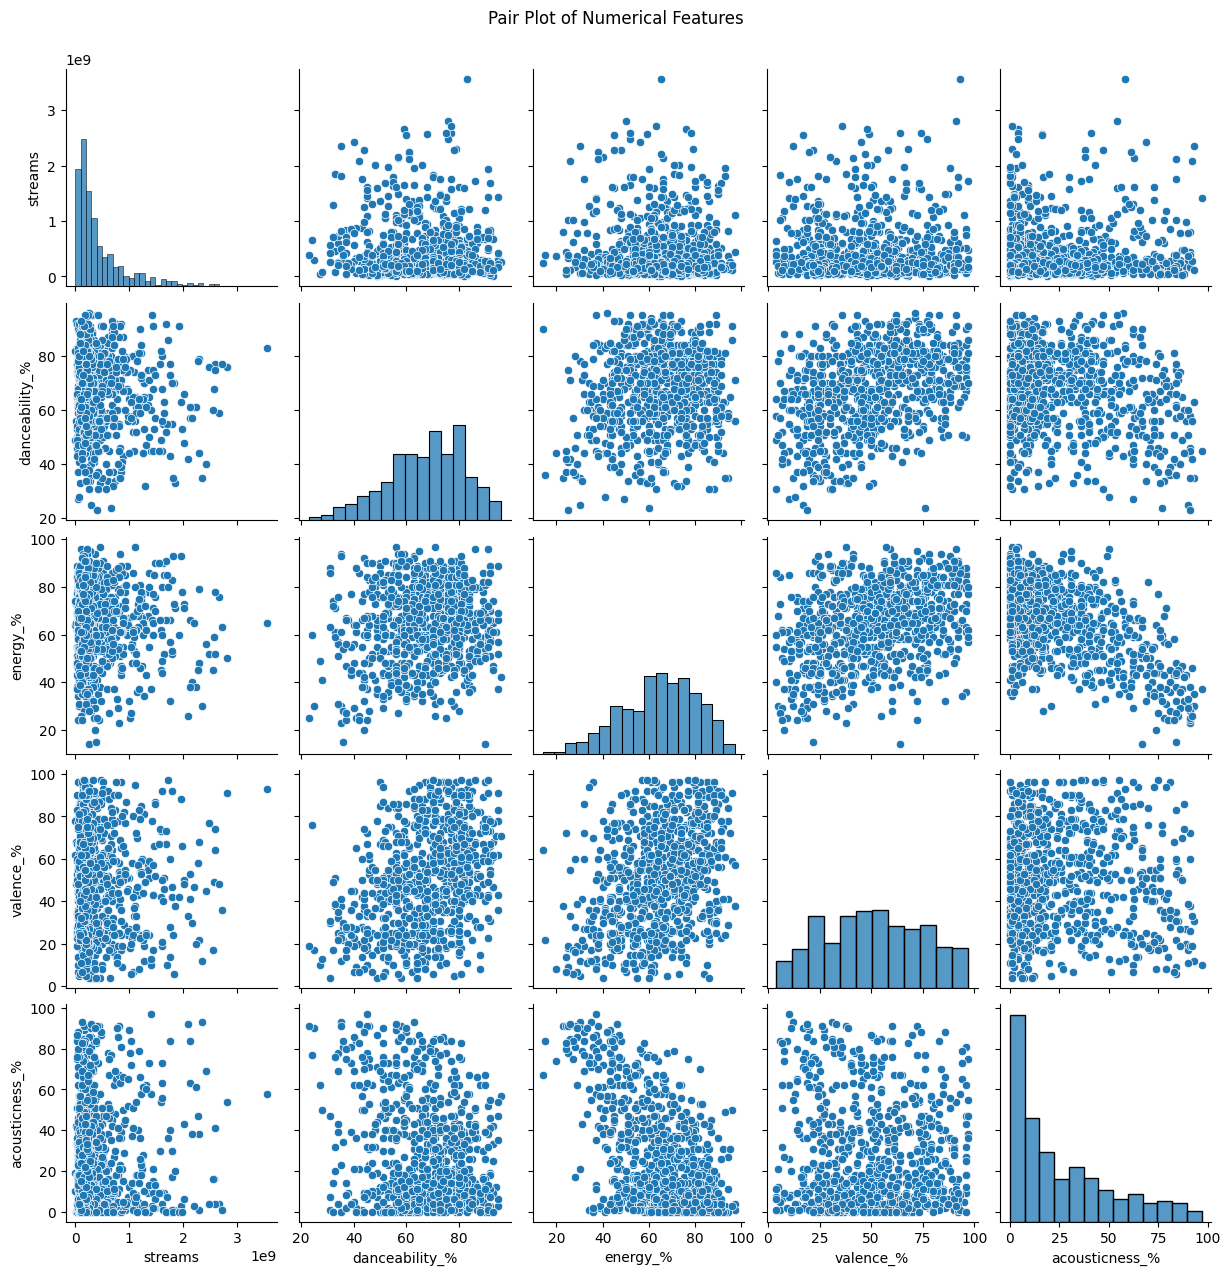

In [10]:
# Pair plot for numerical features
sns.pairplot(df[['streams','danceability_%', 'energy_%', 'valence_%', 'acousticness_%']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


**TODO(Analysis)**

# Top 1000 Categorical Variable Plot of Keys - Visualization #5

Text(0.5, 1.0, "Keys in Spotify's Top 1000 songs of 2023 (so far) ")

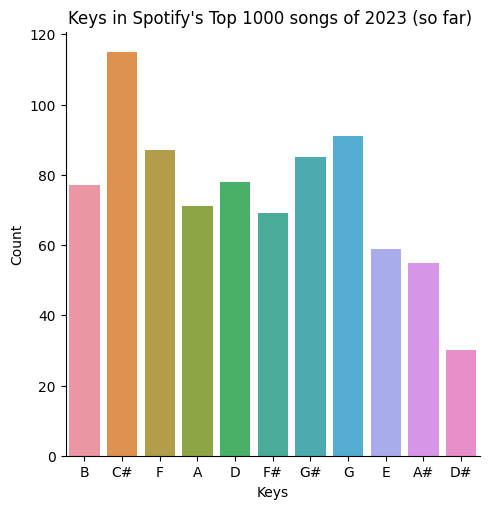

In [11]:
sns.catplot(data = df,x = 'key',kind='count') #Categorical Plot of the keys and their respective counts throught the dataset
plt.xlabel("Keys")
plt.ylabel("Count")
plt.title("Keys in Spotify's Top 1000 songs of 2023 (so far) ")

**TODO(Analysis)**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving spotify_top_charts_22.csv to spotify_top_charts_22.csv


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the datasets
train_data = pd.read_csv('spotify_top_charts_22.csv')
test_data = pd.read_csv('spotify-2023.csv')

train_data['popularity'] = range(1, len(train_data) + 1)
test_data['popularity'] = range(1, len(test_data) + 1)

# Set the 'track_name' column as the index
train_data.set_index('track_name', inplace=True)
test_data.set_index('track_name', inplace=True)

# For simplicity, let's use the row index and 'track_name' as features
X_train = train_data['track_name', 'popularity']
y_train = train_data['popularity']

X_test = test_data[['popularity', 'track_name']]
y_test = test_data['popularity']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, predictions)
print(f'Mean Absolute Error on Validation Set: {mae}')

# Now, you can use the trained model to predict popularity on the test set
test_predictions = model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Mean Absolute Error on Test Set: {test_mae}')

KeyError: ignored